## Greedy connected components 
#### Algorithm for computing the connected components of a graph

In [33]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import combinations
import random
from constants import colors
import math

### Connected components of a graph

In [2]:
def connected_components(graph):
    components = []  # List to store connected components
    visited = set()  # Set to keep track of visited nodes

    def dfs(node, component):
        # Perform DFS traversal starting from a node
        component.add(node)
        visited.add(node)

        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                dfs(neighbor, component)

    for node in graph.nodes():
        if node not in visited:
            current_component = set()
            dfs(node, current_component)
            components.append(current_component)

    return components


### The sequence of painted nodes in a connected graph

In [3]:
def fill_connected(Graph):
    G=Graph.copy()
    remaining=list(G.nodes)
    remaining=remaining[1:]
    start=list(G.nodes)[0]
    ans=[[start]]
    current=[start]
    while remaining:
        new=[]
        for node in current:
            for vertex in list(G.neighbors(node)):
                if vertex in remaining and vertex not in new:
                    new.append(vertex)
        ans.append(new)
        current=new
        for vertex in new:
            remaining.remove(vertex)
    return ans
        


## Frames for animating connected components

In [10]:
def make_frames_components(Graph):
    G=Graph.copy()
    components=connected_components(G)
    n=len(components)
    component_names=colors[:n]
    ans=dict()
    for i in range(n):
        ans[component_names[i]]=fill_connected(G.subgraph(components[i]))
    for color in component_names:
        for j in range(1,len(ans[color])):
            ans[color][j]=ans[color][j-1]+ans[color][j]
    list_of_dicts=[]
    for k in range(n):
        for lista in ans[component_names[k]]:
            new=dict()
            new[component_names[k]]=lista
            for l in range(k):
                new[component_names[l]]=ans[component_names[l]][-1]
            list_of_dicts.append(new)
            


    return list_of_dicts
        


In [13]:
def animate_greedy_connected(Graph,posfunction=nx.circular_layout):
    G=Graph.copy()
    #frames=greedy_color_graph(G,random_order=random_order,position_function=position_function,with_labels=with_labels)["frames"]
    pos = posfunction(G)  # positions for all nodes. There are other possibilities fo layout...
    fig, ax = plt.subplots()
    #Setting the background colors
    ax.set_facecolor('cornsilk')
    fig.set_facecolor('cornsilk')
    frames=[dict()]+make_frames_components(G)
    #nx.draw(G,pos=pos)
    def update(frame):
        ax.clear()
        used_colors=len(frame.keys())
        colordict=dict()
        for node in G.nodes:
            colordict[node]="black"
        for color in list(frame.keys()):
            for node in frame[color]:
                colordict[node]=color
        node_colors=[colordict[node] for node in G.nodes]
        nx.draw(G, pos=pos, nodelist=G.nodes, node_color=node_colors, ax=ax)
        plt.title("Connected components")  
        counter_text = ax.text(0.7, 0, f"Used colors = {used_colors}", transform=ax.transAxes, ha='left', va='top',color="black",fontsize=13)# Make a counter

    ani = FuncAnimation(fig, update, frames=frames, repeat=True)
    # Convert the animation to a JSHTML representation
    ani_jshtml = ani.to_jshtml()
    # Display the animation
    return(HTML(ani_jshtml))

In [28]:
G=nx.erdos_renyi_graph(15,0.1)
len(list(nx.connected_components(G)))

5

In [31]:
import math

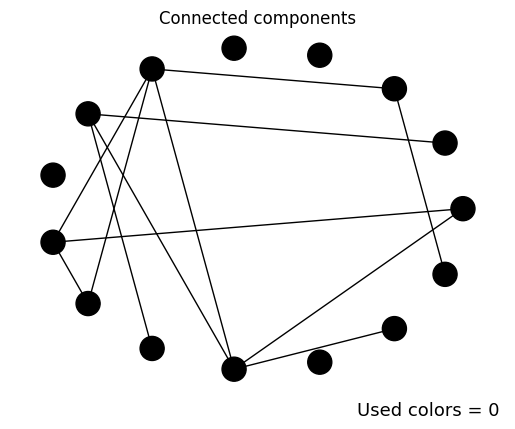

In [44]:
animate_greedy_connected(G)

In [20]:
def hexagonal_lattice_graph(n):
    G = nx.Graph()
    for x in range(-n+1, n):
        for y in range(-n+1, n):
            z = -x - y
            if -n < z and z < n:
                G.add_node((x, y, z))
    for node in G.nodes():
        x, y, z = node
        neighbors = [
            (x+1, y-1, z),
            (x+1, y, z-1),
            (x, y+1, z-1),
            (x-1, y+1, z),
            (x-1, y, z+1),
            (x, y-1, z+1)
        ]
        for neighbor in neighbors:
            if neighbor in G.nodes():
                G.add_edge(node, neighbor)
    return G

In [21]:
def hexagonal_positions(G):
    pos = dict()
    for node in G.nodes():
        x, y, z = node
        pos[node] = (1.5*x, np.sqrt(3) * (y + x/2))
    return pos


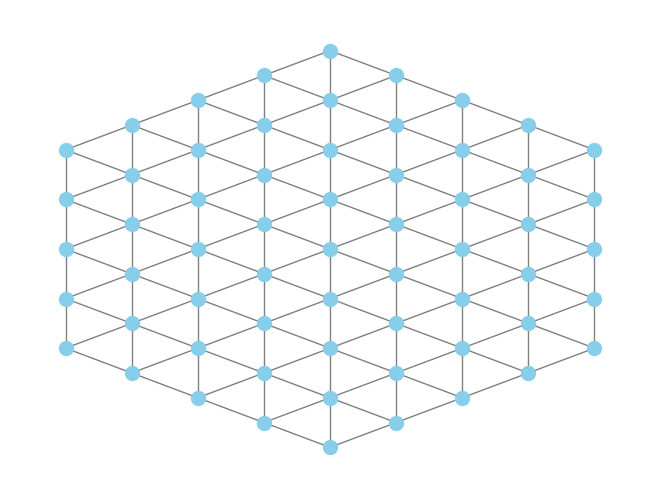

In [23]:
G = hexagonal_lattice_graph(5)
pos = hexagonal_positions(G)
nx.draw(G,pos,with_labels=False, node_color='skyblue', node_size=100, edge_color='gray')
plt.show()

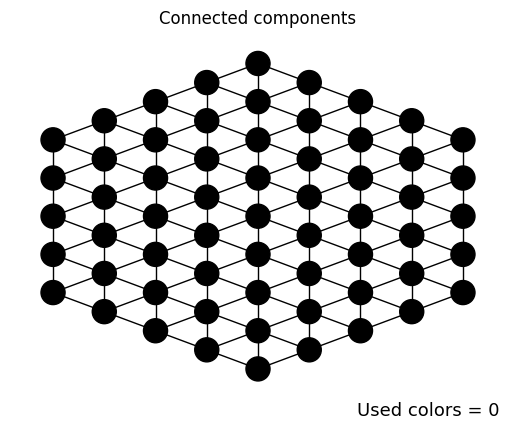

In [24]:
animate_greedy_connected(G,posfunction=hexagonal_positions)